# 03_MasterBDMl_modelo2_breastE2E_feature_selection
Autor: Carlos Wong <br/>
Fecha: 2022_04_17 <br/>
Tipo de problema: `CLASIFICACIÓN` <br/>
Entradas: `dataset: breast_cancer_data` <br/>
Salidas: modelo predictivo  <br/>
Propósito: Descarga, entrenamiento, predicción y documentación con `SKLEARN` <br/>
1. `Librerías + Descarga de datos <-------- `
2. Exploración de la variable objetivo
3. EDA (Exploración de datos)
4. Feature Engineering (Transformación de variables)
5. `Selección de variables <-------- `
6. `Modelos (pipeline, semilla en train_test split y modelos, comparación modelos) <-------- `
7. Métricas de evaluación
8. Selección de algoritmo
9. Parametrización de algoritmo
10. Guardado del modelo

# 1. Librerías + Descarga de datos

In [1]:
# librerías estándar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
#np.set_printoptions(precision=2)
pd.set_option('display.max_columns', 500)  # Muestra hasta 500 columnas del dataframe (evita los puntos '...'')

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# librerías sklearn
import sklearn
from sklearn.feature_selection import SelectKBest, chi2   # <------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer
from sklearn.pipeline import Pipeline, make_pipeline   # <------------------------
from sklearn.decomposition import PCA   # <------------------------
from sklearn.feature_selection import RFE   # <------------------------

In [4]:
# librerías de modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [5]:
data = pd.read_csv(r'.\datasets\breast_cancer_data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
# Se eliminan columnas innecesarias
data = data.drop(['id','Unnamed: 32'], axis=1)

In [8]:
features = data.drop('diagnosis', axis=1)
target = data['diagnosis']

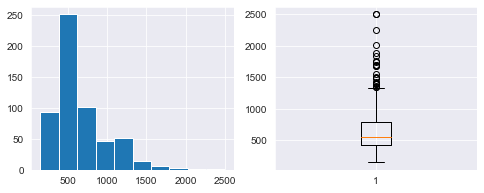

In [9]:
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
plt.hist(data['area_mean'])
plt.subplot(1,2,2)
plt.boxplot(data['area_mean'])
plt.show()

### Ejercicio: Binarizer de conjunto train/test split

In [10]:
# train_test split (80% para train y 20% para test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 99)

## 5. Feature Selection (SelectKBest)

### 5.1. Chi-cuadrado
- Contrasta cada feature con la variable objetivo
- Es un test de independencia que destaca aquellas variables que son relevantes para la clasificación
- Los valores tienen que ser positivos (por eso a veces es necesario es el escalado previo)

In [11]:
X,y = features, target

In [12]:
# Selección del criterio de evaluación
criteria = SelectKBest(score_func=chi2, k=4)   # <-----------
results = criteria.fit(X, y)   # transformador   <-----------

In [13]:
# para conocer datos del modelo hay que preguntar al transformador por ellos
# pero para poder ver el nombre de las variables hay que listarlos y asociarlos con sus variables 'zip'
list(zip(results.scores_, features.columns))

[(266.1049171951789, 'radius_mean'),
 (93.89750809863318, 'texture_mean'),
 (2011.102863767908, 'perimeter_mean'),
 (53991.65592375095, 'area_mean'),
 (0.14989926383938276, 'smoothness_mean'),
 (5.4030754907327, 'compactness_mean'),
 (19.71235355279164, 'concavity_mean'),
 (10.54403542854299, 'concave points_mean'),
 (0.25737977480878865, 'symmetry_mean'),
 (7.430655358550388e-05, 'fractal_dimension_mean'),
 (34.67524723165561, 'radius_se'),
 (0.009793539703986717, 'texture_se'),
 (250.57189635982135, 'perimeter_se'),
 (8758.504705334488, 'area_se'),
 (0.0032662066394236306, 'smoothness_se'),
 (0.6137853315214397, 'compactness_se'),
 (1.0447176147781296, 'concavity_se'),
 (0.3052315633783288, 'concave points_se'),
 (8.036338308403279e-05, 'symmetry_se'),
 (0.006371365657039512, 'fractal_dimension_se'),
 (491.689157433323, 'radius_worst'),
 (174.44939960571077, 'texture_worst'),
 (3665.0354163405914, 'perimeter_worst'),
 (112598.43156405367, 'area_worst'),
 (0.39736569437302727, 'smooth

In [14]:
# para preguntar por los p-valores del modelo
list(zip(results.pvalues_, features.columns))

[(8.013976278327987e-60, 'radius_mean'),
 (3.3229219424707174e-22, 'texture_mean'),
 (0.0, 'perimeter_mean'),
 (0.0, 'area_mean'),
 (0.6986316439643425, 'smoothness_mean'),
 (0.020101299869930245, 'compactness_mean'),
 (9.001757118104553e-06, 'concavity_mean'),
 (0.0011656363837254035, 'concave points_mean'),
 (0.611926026221788, 'symmetry_mean'),
 (0.9931222205939485, 'fractal_dimension_mean'),
 (3.895534287117009e-09, 'radius_se'),
 (0.921168191797165, 'texture_se'),
 (1.9487748916822534e-56, 'perimeter_se'),
 (0.0, 'area_se'),
 (0.9544251208536504, 'smoothness_se'),
 (0.43336611540692405, 'compactness_se'),
 (0.30672681214870456, 'concavity_se'),
 (0.580621137019778, 'concave points_se'),
 (0.992847409687171, 'symmetry_se'),
 (0.9363797534759143, 'fractal_dimension_se'),
 (6.113247507349991e-109, 'radius_worst'),
 (7.896682986749838e-40, 'texture_worst'),
 (0.0, 'perimeter_worst'),
 (0.0, 'area_worst'),
 (0.5284528674102658, 'smoothness_worst'),
 (1.108367622133013e-05, 'compactness

In [15]:
# para ver p-valores junto con scores del modelo
aux = list(zip(results.pvalues_, results.scores_, features.columns))
aux

[(8.013976278327987e-60, 266.1049171951789, 'radius_mean'),
 (3.3229219424707174e-22, 93.89750809863318, 'texture_mean'),
 (0.0, 2011.102863767908, 'perimeter_mean'),
 (0.0, 53991.65592375095, 'area_mean'),
 (0.6986316439643425, 0.14989926383938276, 'smoothness_mean'),
 (0.020101299869930245, 5.4030754907327, 'compactness_mean'),
 (9.001757118104553e-06, 19.71235355279164, 'concavity_mean'),
 (0.0011656363837254035, 10.54403542854299, 'concave points_mean'),
 (0.611926026221788, 0.25737977480878865, 'symmetry_mean'),
 (0.9931222205939485, 7.430655358550388e-05, 'fractal_dimension_mean'),
 (3.895534287117009e-09, 34.67524723165561, 'radius_se'),
 (0.921168191797165, 0.009793539703986717, 'texture_se'),
 (1.9487748916822534e-56, 250.57189635982135, 'perimeter_se'),
 (0.0, 8758.504705334488, 'area_se'),
 (0.9544251208536504, 0.0032662066394236306, 'smoothness_se'),
 (0.43336611540692405, 0.6137853315214397, 'compactness_se'),
 (0.30672681214870456, 1.0447176147781296, 'concavity_se'),
 (0

In [16]:
# para ver los resultados un poco mejor, se meten en un dataframe de pandas
pd_results = pd.DataFrame(aux, columns = ['p-valor','score','feature'])
pd_results.head

<bound method NDFrame.head of           p-valor          score                  feature
0    8.013976e-60     266.104917              radius_mean
1    3.322922e-22      93.897508             texture_mean
2    0.000000e+00    2011.102864           perimeter_mean
3    0.000000e+00   53991.655924                area_mean
4    6.986316e-01       0.149899          smoothness_mean
5    2.010130e-02       5.403075         compactness_mean
6    9.001757e-06      19.712354           concavity_mean
7    1.165636e-03      10.544035      concave points_mean
8    6.119260e-01       0.257380            symmetry_mean
9    9.931222e-01       0.000074   fractal_dimension_mean
10   3.895534e-09      34.675247                radius_se
11   9.211682e-01       0.009794               texture_se
12   1.948775e-56     250.571896             perimeter_se
13   0.000000e+00    8758.504705                  area_se
14   9.544251e-01       0.003266            smoothness_se
15   4.333661e-01       0.613785          

In [17]:
pd_results.sort_values('score', ascending=False)

,p-valor,score,feature
23,0.000000e+00,112598.431564,area_worst
3,0.000000e+00,53991.655924,area_mean
13,0.000000e+00,8758.504705,area_se
22,0.000000e+00,3665.035416,perimeter_worst
2,0.000000e+00,2011.102864,perimeter_mean
20,6.113248e-109,491.689157,radius_worst
0,8.013976e-60,266.104917,radius_mean
12,1.948775e-56,250.571896,perimeter_se
21,7.896683e-40,174.449400,texture_worst
1,3.322922e-22,93.897508,texture_mean


In [18]:
# el modelo se quedará con las 4 siguientes features (las mejores)
pd_results.sort_values('score', ascending=False).head(4)

,p-valor,score,feature
23,0.0,112598.431564,area_worst
3,0.0,53991.655924,area_mean
13,0.0,8758.504705,area_se
22,0.0,3665.035416,perimeter_worst


In [19]:
def plot_hist_box(feature):
    plt.figure(figsize = (15,3))
    plt.subplot(1,2,1)
    sns.histplot(x=feature, data=data, hue='diagnosis',kde=True)
    plt.subplot(1,2,2)
    sns.violinplot(x=feature, y='diagnosis', data=data)
    plt.show()

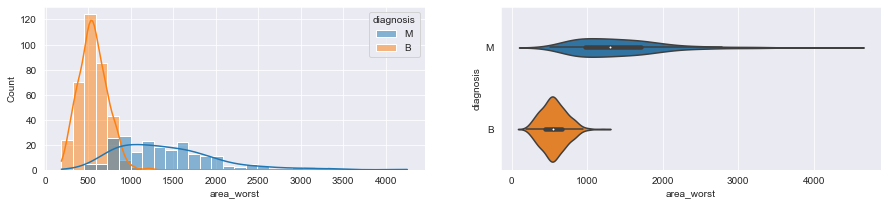

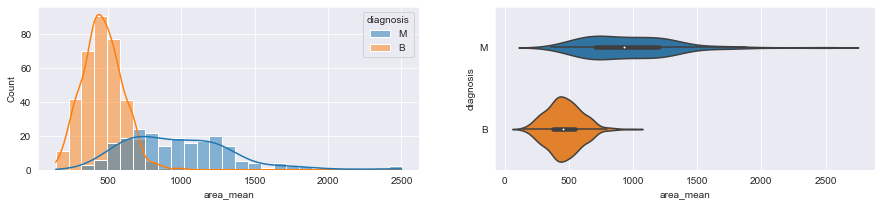

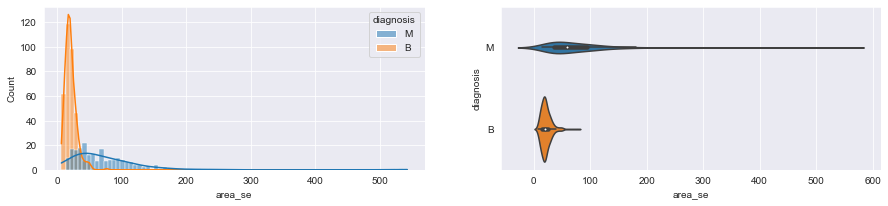

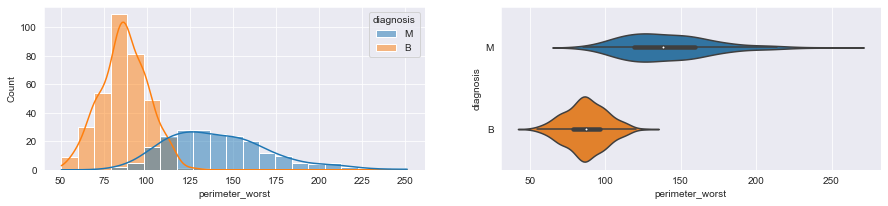

In [20]:
# las gráficas muestras que las mejores features explican muy bien la variable objetivo
plot_hist_box('area_worst')
plot_hist_box('area_mean')
plot_hist_box('area_se')
plot_hist_box('perimeter_worst')

## Ejercicio (!): 
### Pipeline con:
- train_test_split, 
- minmax_scaler, 
- faeture_extraction de k=4 y 
- logistic regression

In [21]:
# 'make_pipeline' ahorra el tener que poner nosotros un nombre, lo pone por defecto la función
from sklearn.pipeline import make_pipeline

X, y = features, target
# train_test split no entra en el pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)

# el modelo se entrena con el train y se saca el score sobre el test
scaler = MinMaxScaler()   # 1ro. va el MinMaxScaler porque no puede tener valores negativos
selector = SelectKBest(score_func=chi2, k=4)  # se seleccionan primero las mejores 4 variables
algorithm = LogisticRegression (random_state=99) # se entrena el algoritmo sólo con las 4 mejores variables

pipeline = make_pipeline(scaler,selector,algorithm)
pipeline.fit(X_train, y_train)
results = pipeline.score(X_test, y_test)  # Se saca el resultado con el conjunto test

print(results)

0.9370629370629371


In [22]:
# se mete en un bucle 'for' el MISMO CÓDIGO para identificar con cuántas variables da mejor resultado
X, y = features, target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)

scaler = MinMaxScaler()   
algorithm = LogisticRegression (random_state=99) 

for i in range(4,30):  # <-------------
    selector = SelectKBest(score_func=chi2, k=i) 
    
    pipeline = make_pipeline(scaler,selector,algorithm)
    pipeline.fit(X_train, y_train)
    results = pipeline.score(X_test, y_test)  # Se saca el resultado con el conjunto test

    print(str(i) + ', accuracy = '+ str(results))

4, accuracy = 0.9370629370629371
5, accuracy = 0.9370629370629371
6, accuracy = 0.9370629370629371
7, accuracy = 0.9370629370629371
8, accuracy = 0.9370629370629371
9, accuracy = 0.9300699300699301
10, accuracy = 0.9300699300699301
11, accuracy = 0.9440559440559441
12, accuracy = 0.9440559440559441
13, accuracy = 0.9440559440559441
14, accuracy = 0.9370629370629371
15, accuracy = 0.9370629370629371
16, accuracy = 0.951048951048951
17, accuracy = 0.951048951048951
18, accuracy = 0.958041958041958
19, accuracy = 0.972027972027972
20, accuracy = 0.972027972027972
21, accuracy = 0.972027972027972
22, accuracy = 0.965034965034965
23, accuracy = 0.972027972027972
24, accuracy = 0.972027972027972
25, accuracy = 0.965034965034965
26, accuracy = 0.972027972027972
27, accuracy = 0.965034965034965
28, accuracy = 0.972027972027972
29, accuracy = 0.972027972027972


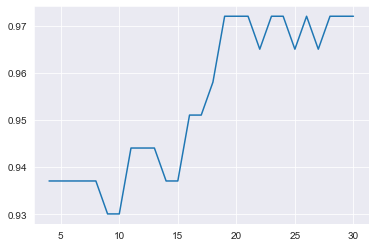

In [23]:
# se mete en un bucle 'for' el MISMO CÓDIGO para identificar con cuántas variables da mejor resultado
X, y = features, target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)

scaler = MinMaxScaler()   
algorithm = LogisticRegression (random_state=99) 

accuracies = []  # <-------------
n_features = []  # <-------------

for i in range(4,31):
    selector = SelectKBest(score_func=chi2, k=i) 
    
    pipeline = make_pipeline(scaler,selector,algorithm)
    pipeline.fit(X_train, y_train)
    results = pipeline.score(X_test, y_test)

    n_features.append(i)  # <-------------
    accuracies.append(results)  # <-------------
    
#    print(str(i) + ', accuracy = '+ str(results))

plt.plot(n_features, accuracies)
plt.show()

# Se concluye que el volumen adecuado es trabajar con 19 variables
# El siguiente paso es seleccionar los mejores modelos ...

### Feature Importances

In [24]:
X, y = features, target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
results = model.score(X_test, y_test)
print(results)

0.9370629370629371


In [25]:
# '.feature_importances_' sirve para mostrar las variables más importantes
model.feature_importances_

array([0.        , 0.04345952, 0.        , 0.09326729, 0.00975865,
       0.00491417, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00786268, 0.        , 0.04301544, 0.00655223,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03474724, 0.        , 0.        , 0.00822241,
       0.        , 0.        , 0.74820038, 0.        , 0.        ])

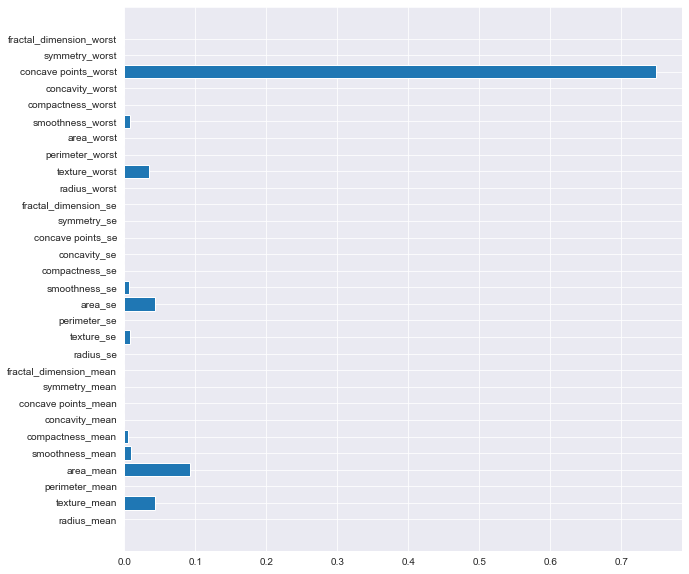

In [26]:
# la función 'feature_importances_' muestras las variables más importantes
plt.figure(figsize=(10,10))
plt.barh(y=X.columns, width=model.feature_importances_)
plt.show()

In [27]:
# Usando un algoritmo tipo ensemble y manteniendo el mismo código
from sklearn.ensemble import ExtraTreesClassifier

X, y = features, target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)

model = ExtraTreesClassifier()
model.fit(X_train, y_train)
results = model.score(X_test, y_test)
print(results)

0.972027972027972


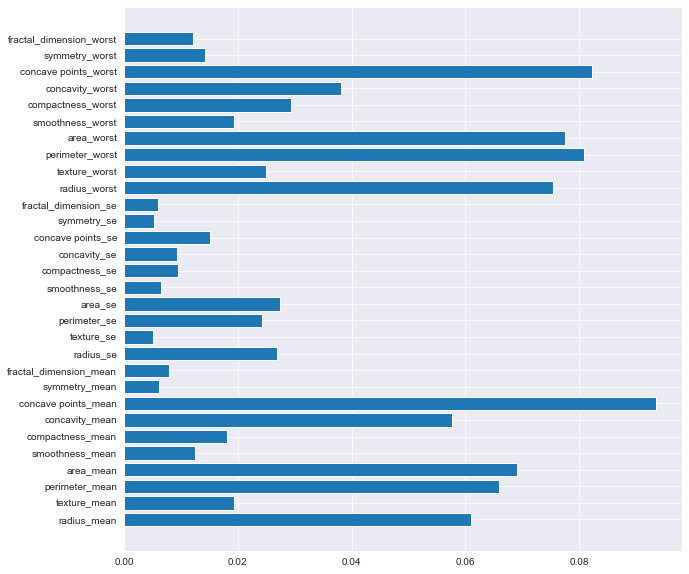

In [28]:
# la función 'feature_importances_' muestras las variables más importantes
# NO TODOS los modelos cuentas con la función 'feature_importances_'
plt.figure(figsize=(10,10))
plt.barh(y=X.columns, width=model.feature_importances_)
plt.show()

### Para sacar los Feature Importances de una Regresión Logística

0.972027972027972


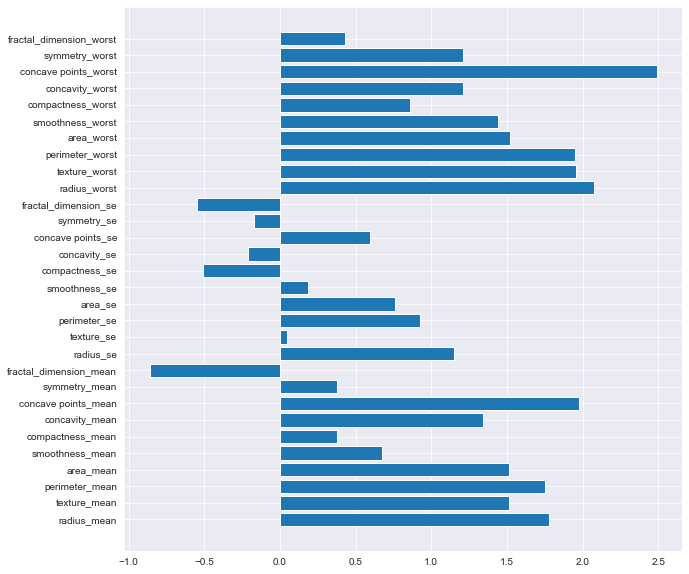

In [29]:
algorithm = LogisticRegression (random_state=99) 
scaler = MinMaxScaler()  # reescala los valores entre 0 y 1 
pipeline = make_pipeline(scaler, algorithm)

pipeline.fit(X_train,y_train)  # entrenamiemiento
print(pipeline.score(X_test,y_test))

plt.figure(figsize=(10,10))

# !!!! los coeficientes '.coef_' NO se pueden preguntar al pipeline, sino al algoritmo !!!!
# Se pueden sacar los '.coef_' porque el LogisticRegression tiene como atributo ese valor
# 'plt.barh' hace un plot de barras horizontal
# Se muestran los coeficientes normalizados
# Que salgan valores (+) o (-) significan que están correlacionados positiva o negativamente
# Se puede observar que la variable 'concave points_worst' está definida como más predictora por 2 algoritmos
plt.barh(y=X_train.columns, width=algorithm.coef_[0])
plt.show()

In [30]:
# Los coeficientes se generan en formato array con '[[....]]'
# no permiten insertarse en una gráfica
algorithm.coef_

array([[ 1.77678778,  1.51286681,  1.75216256,  1.51152036,  0.67601265,
         0.37931577,  1.3383281 ,  1.97707332,  0.37531651, -0.86291661,
         1.14972133,  0.04861534,  0.92259575,  0.75658664,  0.185712  ,
        -0.51043942, -0.21413679,  0.5973791 , -0.17546611, -0.55060287,
         2.07244031,  1.95552166,  1.95066918,  1.51924418,  1.44349276,
         0.86017535,  1.21060389,  2.49090343,  1.21141362,  0.43137159]])

In [31]:
# requiere que se extraigan del primer juego de '[]' usando '[0]'
algorithm.coef_[0]

array([ 1.77678778,  1.51286681,  1.75216256,  1.51152036,  0.67601265,
        0.37931577,  1.3383281 ,  1.97707332,  0.37531651, -0.86291661,
        1.14972133,  0.04861534,  0.92259575,  0.75658664,  0.185712  ,
       -0.51043942, -0.21413679,  0.5973791 , -0.17546611, -0.55060287,
        2.07244031,  1.95552166,  1.95066918,  1.51924418,  1.44349276,
        0.86017535,  1.21060389,  2.49090343,  1.21141362,  0.43137159])

## Componentes Principales (PCA)

In [32]:
pca = PCA(n_components=4)
pca_fitted = pca.fit(X)

In [33]:
# 'explained_variance_ratio_': ndarray of shape (n_components,)
# Percentage of variance explained by each of the selected components.
# If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.
pca_fitted.explained_variance_ratio_

array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04])

In [34]:
# 'components_': ndarray of shape (n_components, n_features)
# pca_fitted.components_

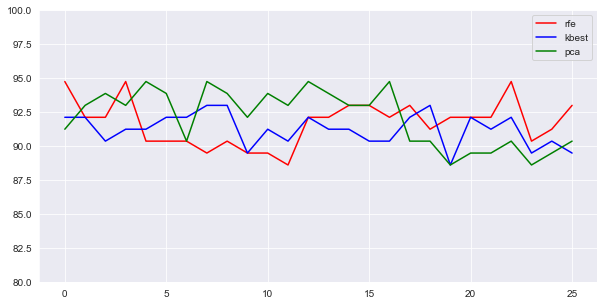

In [35]:
# Ejercicio, haced un pipeline que compare, con un 'Decision tree', minmaxscaler y rfe/kbest/pca para k=4:30
# Se puede probar con cualquier algoritmo además de Decision Tree
X, y = features, target

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=99)

algorithm = DecisionTreeClassifier(random_state=99)
scaler = MinMaxScaler()

accuracies_rfe = []  # recursive feature elimination
accuracies_kbest = []
accuracies_pca = []

for k in range(4, 30):
    selector1 = SelectKBest(score_func=chi2, k=k)
    model1 = make_pipeline(scaler, selector1, algorithm)  # pipeline
    model1.fit(X_train, Y_train)  # entrenamiento
    result = model1.score(X_test, Y_test)   # prueba
    accuracies_rfe.append(result*100) 
    
    selector2 = RFE(algorithm, n_features_to_select=k)
    model2 = make_pipeline(scaler, selector2, algorithm)
    model2.fit(X_train, Y_train)
    result = model2.score(X_test, Y_test)
    accuracies_kbest.append(result*100)
    
    selector3 = PCA(n_components=k)
    model3 = make_pipeline(scaler, selector3, algorithm)
    model3.fit(X_train, Y_train)
    result = model3.score(X_test, Y_test)
    accuracies_pca.append(result*100)
    
plt.figure(figsize=(10,5))
plt.plot(accuracies_rfe, '-', color="red", label="rfe")
plt.plot(accuracies_kbest, '-', color="blue", label="kbest")
plt.plot(accuracies_pca, '-', color="green", label="pca")
plt.ylim((80,100))
plt.legend()
plt.show()